# Gamma distribution

**References:**
- https://en.wikipedia.org/wiki/Gamma_distribution

In probability theory and statistics, the gamma distribution is a two-parameter family of continuous probability distributions.

Special cases of the gamma distribution:
- exponential distribution
- Erlang distribution
- $\chi^{2}$ distribution

There are three different parametrizations in common use:

- With a shape parameter k and a scale parameter θ.
- With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.
- With a shape parameter k and a mean parameter μ = kθ = α/β.

In each of these three forms, both parameters are positive real numbers.

## Probability distribution function (PDF)


### Characterization with parameters shape $\alpha$ and rate $\beta$

\begin{equation}
    f(x)
    =
    \frac{\beta^\alpha
    x^{\alpha - 1}
    e^{-\beta x}}
    {\Gamma(\alpha)}
    =
    \frac{1}{\beta^{-\alpha} \Gamma(\alpha)}
    x^{\alpha - 1}
    e^{-\beta x}
\end{equation}

where:

- $x > 0$
- $\alpha > 0$
- $\beta > 0$

### Characterization with parameters shape $k$ and scale $\theta$

\begin{equation}
    f(x)
    =
    \frac{x^{k-1} e^{-\frac{x}{\theta}}}
    {\theta^{k}\Gamma(k)}
\end{equation}

where:

- $x > 0$
- $k > 0$
- $\theta > 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import scipy.stats
%matplotlib inline

## PDF

In [2]:
def plot_gamma_distributions(alpha_beta_list, cmap_name, cm_min, cm_max, color_index):
    
    x = np.linspace(0.0, 10.0, 100)
    
    f,a = plt.subplots()
    
    cm = plt.get_cmap(cmap_name) 
    cm_norm = colors.Normalize(vmin=cm_min, vmax=cm_max)
    cm_map  = cmx.ScalarMappable(norm=cm_norm, cmap=cm)
    
    for alpha_beta in alpha_beta_list:
        alpha = alpha_beta[0]
        beta  = alpha_beta[1]
        
        pdf = scipy.stats.gamma.pdf(x, a=alpha, scale=1/beta)
        
        c = cm_map.to_rgba(alpha_beta[color_index])
        label = r"$\alpha = {:.1f}$ $\beta = {:.1f}$".format(alpha,beta)
        
        a.plot(x,pdf,label=label,c=c)
        
    a.set_xlabel('x')
    a.set_ylabel('PDF')
    a.legend()
    return f,a

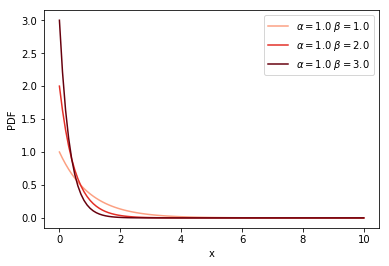

In [3]:
alpha_betas = [[1.0,1.0],
              [1.0,2.0],
              [1.0,3.0],
             ]
f,a = plot_gamma_distributions(alpha_betas, cmap_name='Reds', cm_min=0.0, cm_max=3.0, color_index=1)

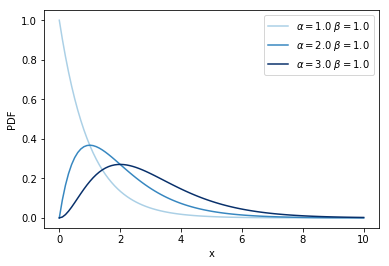

In [4]:
alpha_betas = [[1.0,1.0],
              [2.0,1.0],
              [3.0,1.0],
             ]
f,a = plot_gamma_distributions(alpha_betas, cmap_name='Blues', cm_min=0.0, cm_max=3.0, color_index=0)

## Relationship between $\Gamma(\alpha,\beta)$ and $\chi^{2}$

### $\chi^{2}$ distribution

#### PDF

\begin{equation}
    f(x)
    =
    \frac{1}{2^{\frac{\nu}{2}} \Gamma\left(\frac{\nu}{2}\right)}
    x^{\frac{\nu}{2}-1}
    e^{- \frac{x}{2}}
\end{equation}


### Conversion

\begin{equation}
    \Gamma\left(\alpha=\nu/2, \beta=\frac{1}{2}\right)
    =
    \Gamma\left(k=\nu/2, \theta=2 \right)
    =
    \chi^{2}(\nu)
\end{equation}

Example:
- $\nu=1$

\begin{equation}
    \Gamma\left(\alpha = \frac{1}{2}, \beta=\frac{1}{2}\right)
    =
    \Gamma\left(k=\frac{1}{2}, \theta=2\right)
    =
    \chi^{2}(\nu=1)
\end{equation}

In [5]:
x = np.linspace(0.0, 10.0, 100)
pdf_chi2_df1 = scipy.stats.chi2.pdf(x, df=1)
pdf_chi2_df2 = scipy.stats.chi2.pdf(x, df=2)
pdf_chi2_df3 = scipy.stats.chi2.pdf(x, df=3)
pdf_gamma_a = scipy.stats.gamma.pdf(x, a=0.5, scale=1.0/0.5)
pdf_gamma_b = scipy.stats.gamma.pdf(x, a=1.0, scale=1.0/0.5)

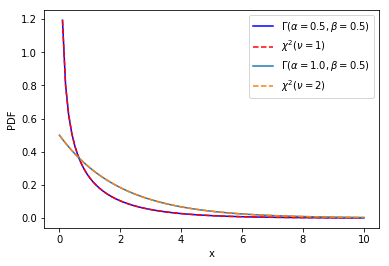

In [6]:
f,a = plt.subplots()
a.plot(x, pdf_gamma_a, label=r'$\Gamma(\alpha=0.5, \beta=0.5)$', c='b', linestyle='-')
a.plot(x, pdf_chi2_df1, label=r'$\chi^{2}(\nu=1)$', linestyle='--', c='r')
a.plot(x, pdf_gamma_b, label=r'$\Gamma(\alpha=1.0, \beta=0.5)$')
a.plot(x, pdf_chi2_df2, label=r'$\chi^{2}(\nu=2)$', linestyle='--')
a.set_xlabel('x')
a.set_ylabel('PDF')
a.legend()

## Relationship between $\Gamma(\alpha,\beta)$ and the exponential distribution

### Exponential distribution

#### PDF:

\begin{equation}
    f(x) = H(x) \lambda e ^{-\lambda x}
\end{equation}

#### Conversion

\begin{equation}
    \Gamma\left(\alpha=1, \beta=\lambda \right)
    =
    \Gamma\left(k=1, \theta=\frac{1}{\lambda} \right)
    =
    Exp(\lambda)
\end{equation}

In [7]:
x = np.linspace(0.0, 10.0, 100)
lam=1; pdf_exp_lambda_1 = scipy.stats.expon.pdf(x, scale=1.0/lam)
lam=5; pdf_exp_lambda_5 = scipy.stats.expon.pdf(x, scale=1.0/lam)
beta=1; pdf_gamma_a = scipy.stats.gamma.pdf(x, a=1.0, scale=1.0/beta)
beta=5; pdf_gamma_b = scipy.stats.gamma.pdf(x, a=1.0, scale=1.0/beta)

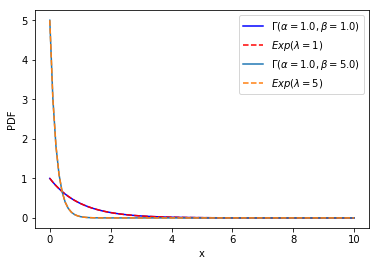

In [8]:
f,a = plt.subplots()
a.plot(x, pdf_gamma_a, label=r'$\Gamma(\alpha=1.0, \beta=1.0)$', c='b', linestyle='-')
a.plot(x, pdf_exp_lambda_1, label=r'$Exp(\lambda=1)$', linestyle='--', c='r')
a.plot(x, pdf_gamma_b, label=r'$\Gamma(\alpha=1.0, \beta=5.0)$')
a.plot(x, pdf_exp_lambda_5, label=r'$Exp(\lambda=5)$', linestyle='--')
a.set_xlabel('x')
a.set_ylabel('PDF')
a.legend()